In [44]:
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [78]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from collections import Counter

In [41]:
# set default theme
sns.set_theme()

In [152]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold
import sklearn.model_selection

In [153]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

## Overview

- [Decision Tree Classifier](#Decision-Tree-Classifier)
- [Bagging Decision Tree Classifier](#Bagging-Decision-Tree-Classifier)
- [Random Forests Classifier](#Random-Forests-Classifier)
- [Summary](#Summary)

## Data Set

The data set has statistics of every NBA basketball player during their rookie year. In addition to their normal statistics, the CSV file has a class column called “TARGET_5YRS”. TARGET_5YRS is a binary response variable that takes on the value either 1 or 0. 

- If TARGET_5YRS is equal to 1, it implies that player has made it to 5 or more years in the NBA. 

- If TARGET_5YRS is equal to 0, which implies the player either is too young to have played 5 years or did not make it to 5 years in the NBA.

**Download link:**

https://data.world/jz5jx/logistic-regression-and-simple-machine-learning-nba-rookies/workspace/file?filename=nba_logreg.csv

## Load and Prepare Data

In [5]:
nba_rookie_df = pd.read_csv('data/nba_rookie_player_stats.csv')

In [6]:
nba_rookie_df.head()

,RecordID,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,1,A.C. Green,82,18.8,6.4,2.5,4.7,53.9,0.0,0.1,...,2.0,61.1,2.0,2.7,4.6,0.7,0.6,0.6,1.2,1.0
1,2,A.J. English,70,20.6,8.8,3.6,8.2,43.9,0.0,0.4,...,2.2,70.7,0.9,1.2,2.1,2.5,0.4,0.2,1.6,0.0
2,3,A.J. Price,56,15.4,7.3,2.6,6.3,41.0,1.1,3.1,...,1.3,80.0,0.2,1.4,1.6,1.9,0.6,0.1,1.1,1.0
3,4,Aaron Brooks,51,11.9,5.2,1.8,4.4,41.3,0.7,2.1,...,1.0,85.7,0.3,0.8,1.1,1.7,0.3,0.1,0.9,1.0
4,5,Aaron Gordon,47,17.0,5.2,2.0,4.4,44.7,0.3,1.0,...,1.3,72.1,1.0,2.6,3.6,0.7,0.5,0.5,0.8,0.0


In [76]:
# take backup of data frame
nba_rookie_df_copy = nba_rookie_df.copy()

In [8]:
nba_rookie_df.columns

Index(['RecordID', 'Name', 'GP', 'MIN', 'PTS', 'FGM', 'FGA', 'FG%', '3P Made',
       '3PA', '3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB', 'REB', 'AST', 'STL',
       'BLK', 'TOV', 'TARGET_5Yrs'],
      dtype='object')

### Rename columns

In [9]:
nba_rookie_df.columns = ['RecordID', 'name', 'games_played', 'minutes', 'points', 'field_goals_made', 'field_goals_attempted', 'field_goal_pct', '3p_made',
       '3p_attempted', '3p_pct', 'free_throws_made', 'free_throws_attempted', 'free_throws_pct', 'offensive_rebounds', 'defensive_rebounds', 'total_rebounds', 'assists', 'steals',
       'blocks', 'turnovers', 'target_5yrs']

In [13]:
nba_rookie_df = nba_rookie_df.drop('RecordID', axis = 1)

In [14]:
nba_rookie_df.head()

,name,games_played,minutes,points,field_goals_made,field_goals_attempted,field_goal_pct,3p_made,3p_attempted,3p_pct,...,free_throws_attempted,free_throws_pct,offensive_rebounds,defensive_rebounds,total_rebounds,assists,steals,blocks,turnovers,target_5yrs
0,A.C. Green,82,18.8,6.4,2.5,4.7,53.9,0.0,0.1,16.7,...,2.0,61.1,2.0,2.7,4.6,0.7,0.6,0.6,1.2,1.0
1,A.J. English,70,20.6,8.8,3.6,8.2,43.9,0.0,0.4,9.7,...,2.2,70.7,0.9,1.2,2.1,2.5,0.4,0.2,1.6,0.0
2,A.J. Price,56,15.4,7.3,2.6,6.3,41.0,1.1,3.1,34.5,...,1.3,80.0,0.2,1.4,1.6,1.9,0.6,0.1,1.1,1.0
3,Aaron Brooks,51,11.9,5.2,1.8,4.4,41.3,0.7,2.1,33.0,...,1.0,85.7,0.3,0.8,1.1,1.7,0.3,0.1,0.9,1.0
4,Aaron Gordon,47,17.0,5.2,2.0,4.4,44.7,0.3,1.0,27.1,...,1.3,72.1,1.0,2.6,3.6,0.7,0.5,0.5,0.8,0.0


In [15]:
nba_rookie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308 entries, 0 to 1307
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   name                   1308 non-null   object 
 1   games_played           1308 non-null   int64  
 2   minutes                1308 non-null   float64
 3   points                 1308 non-null   float64
 4   field_goals_made       1308 non-null   float64
 5   field_goals_attempted  1308 non-null   float64
 6   field_goal_pct         1308 non-null   float64
 7   3p_made                1308 non-null   float64
 8   3p_attempted           1308 non-null   float64
 9   3p_pct                 1298 non-null   float64
 10  free_throws_made       1308 non-null   float64
 11  free_throws_attempted  1308 non-null   float64
 12  free_throws_pct        1308 non-null   float64
 13  offensive_rebounds     1308 non-null   float64
 14  defensive_rebounds     1308 non-null   float64
 15  tota

In [16]:
nba_rookie_df.describe()

,games_played,minutes,points,field_goals_made,field_goals_attempted,field_goal_pct,3p_made,3p_attempted,3p_pct,free_throws_made,free_throws_attempted,free_throws_pct,offensive_rebounds,defensive_rebounds,total_rebounds,assists,steals,blocks,turnovers,target_5yrs
count,1308.000000,1308.000000,1308.000000,1308.00000,1308.000000,1308.000000,1308.000000,1308.000000,1298.000000,1308.000000,1308.000000,1308.000000,1308.000000,1308.000000,1308.000000,1308.000000,1308.000000,1308.000000,1308.000000,1308.000000
mean,60.344801,17.605352,6.785321,2.62263,5.871865,44.173242,0.249083,0.781422,19.385439,1.292890,1.815291,70.330505,1.008639,2.023930,3.031575,1.543807,0.616820,0.369495,1.189144,0.623853
std,17.406994,8.286363,4.331749,1.67271,3.572138,6.120518,0.385813,1.066431,16.088891,0.980687,1.315755,10.545422,0.774652,1.356342,2.050380,1.468204,0.409704,0.431109,0.719977,0.484603
min,11.000000,3.100000,0.700000,0.30000,0.800000,23.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.300000,0.000000,0.000000,0.000000,0.100000,0.000000
25%,47.000000,10.900000,3.700000,1.40000,3.300000,40.200000,0.000000,0.000000,0.000000,0.600000,0.900000,64.700000,0.400000,1.000000,1.500000,0.600000,0.300000,0.100000,0.700000,0.000000
50%,63.000000,16.100000,5.550000,2.10000,4.800000,44.050000,0.100000,0.300000,22.500000,1.000000,1.500000,71.200000,0.800000,1.700000,2.500000,1.100000,0.500000,0.200000,1.000000,1.000000
75%,77.000000,22.825000,8.800000,3.40000,7.500000,47.825000,0.400000,1.200000,32.700000,1.600000,2.300000,77.500000,1.400000,2.600000,3.900000,2.000000,0.800000,0.500000,1.500000,1.000000
max,82.000000,40.900000,28.200000,10.20000,19.800000,73.700000,2.300000,6.500000,100.000000,7.700000,10.200000,100.000000,5.300000,9.600000,13.900000,10.600000,2.500000,3.900000,4.400000,1.000000


## Plot Histograms

In [67]:
def plot_histograms(column_list):
    '''
    Description: Function to plot histograms for each column in column_list argument
    
    args: column_list - list of columns to plot
    '''    
    fig, axes = plt.subplots(1, len(column_list), figsize=(20, 4))
    for col_name, ax in zip(column_list, axes):
        ax.hist(nba_rookie_df[col_name], bins=15, linewidth=0.5, edgecolor="white")
        ax.set_xlabel(col_name)
        ax.set_ylabel("No. of Players")

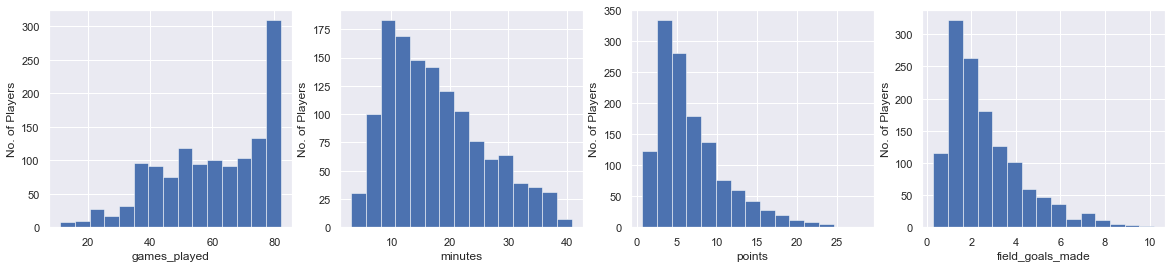

In [68]:
plot_histograms(['games_played', 'minutes', 'points', 'field_goals_made'])

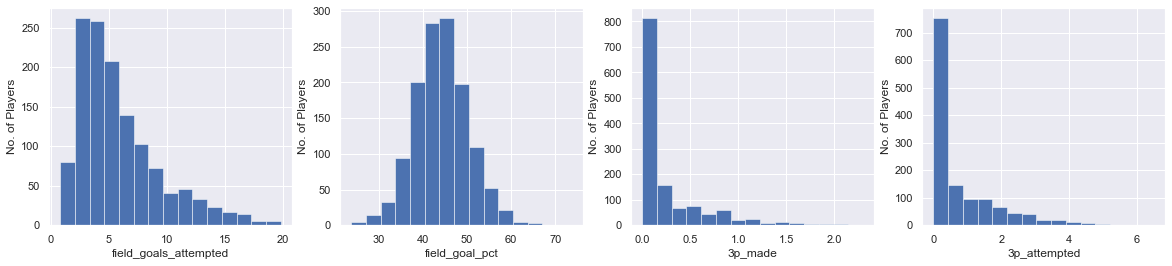

In [69]:
plot_histograms(['field_goals_attempted', 'field_goal_pct', '3p_made', '3p_attempted'])

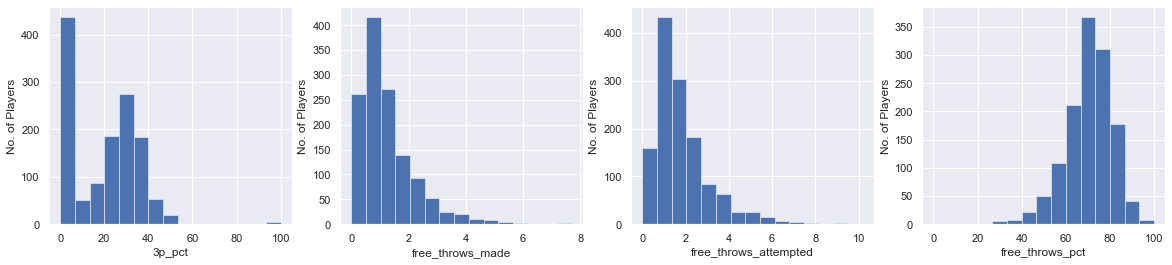

In [70]:
plot_histograms(['3p_pct', 'free_throws_made', 'free_throws_attempted', 'free_throws_pct'])

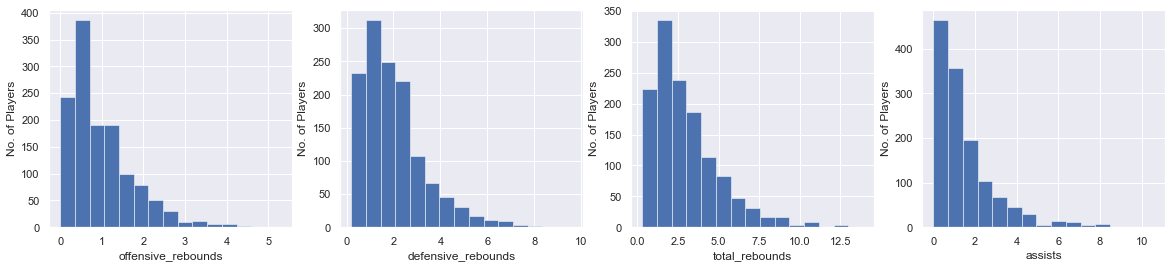

In [71]:
plot_histograms(['offensive_rebounds', 'defensive_rebounds', 'total_rebounds', 'assists'])

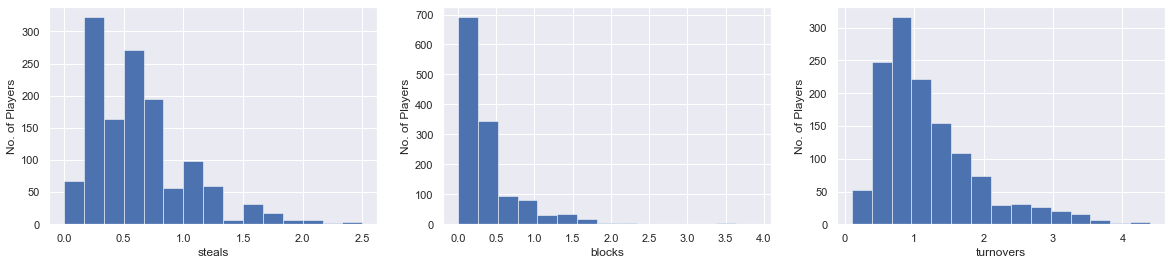

In [72]:
plot_histograms(['steals', 'blocks', 'turnovers'])

## Feature Selection

> Since percentage features are derived from other features they will be redundant features.  The percentages will be removed from the list of features used as input for the ensemble models

In [73]:
percent_columns = ['field_goal_pct', '3p_pct', 'free_throws_pct']

In [74]:
nba_rookie_df = nba_rookie_df.drop(percent_columns, axis= 1)

In [79]:
nba_rookie_df["target_5yrs"] = nba_rookie_df["target_5yrs"].astype("int")

In [81]:
nba_rookie_df.head()

,name,games_played,minutes,points,field_goals_made,field_goals_attempted,3p_made,3p_attempted,free_throws_made,free_throws_attempted,offensive_rebounds,defensive_rebounds,total_rebounds,assists,steals,blocks,turnovers,target_5yrs
0,A.C. Green,82,18.8,6.4,2.5,4.7,0.0,0.1,1.2,2.0,2.0,2.7,4.6,0.7,0.6,0.6,1.2,1
1,A.J. English,70,20.6,8.8,3.6,8.2,0.0,0.4,1.6,2.2,0.9,1.2,2.1,2.5,0.4,0.2,1.6,0
2,A.J. Price,56,15.4,7.3,2.6,6.3,1.1,3.1,1.1,1.3,0.2,1.4,1.6,1.9,0.6,0.1,1.1,1
3,Aaron Brooks,51,11.9,5.2,1.8,4.4,0.7,2.1,0.8,1.0,0.3,0.8,1.1,1.7,0.3,0.1,0.9,1
4,Aaron Gordon,47,17.0,5.2,2.0,4.4,0.3,1.0,0.9,1.3,1.0,2.6,3.6,0.7,0.5,0.5,0.8,0


In [82]:
nba_rookie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308 entries, 0 to 1307
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   name                   1308 non-null   object 
 1   games_played           1308 non-null   int64  
 2   minutes                1308 non-null   float64
 3   points                 1308 non-null   float64
 4   field_goals_made       1308 non-null   float64
 5   field_goals_attempted  1308 non-null   float64
 6   3p_made                1308 non-null   float64
 7   3p_attempted           1308 non-null   float64
 8   free_throws_made       1308 non-null   float64
 9   free_throws_attempted  1308 non-null   float64
 10  offensive_rebounds     1308 non-null   float64
 11  defensive_rebounds     1308 non-null   float64
 12  total_rebounds         1308 non-null   float64
 13  assists                1308 non-null   float64
 14  steals                 1308 non-null   float64
 15  bloc

In [83]:
nba_rookie_df["target_5yrs"].value_counts()

1    816
0    492
Name: target_5yrs, dtype: int64

## Decision Tree Classifier

In [105]:
X = nba_rookie_df.drop(['name','target_5yrs'], axis=1).values

In [106]:
X[:4]

array([[82. , 18.8,  6.4,  2.5,  4.7,  0. ,  0.1,  1.2,  2. ,  2. ,  2.7,
         4.6,  0.7,  0.6,  0.6,  1.2],
       [70. , 20.6,  8.8,  3.6,  8.2,  0. ,  0.4,  1.6,  2.2,  0.9,  1.2,
         2.1,  2.5,  0.4,  0.2,  1.6],
       [56. , 15.4,  7.3,  2.6,  6.3,  1.1,  3.1,  1.1,  1.3,  0.2,  1.4,
         1.6,  1.9,  0.6,  0.1,  1.1],
       [51. , 11.9,  5.2,  1.8,  4.4,  0.7,  2.1,  0.8,  1. ,  0.3,  0.8,
         1.1,  1.7,  0.3,  0.1,  0.9]])

In [107]:
X.shape

(1308, 16)

In [95]:
Y = nba_rookie_df[['target_5yrs']].values.ravel()

In [96]:
Y[:4]

array([1, 0, 1, 1])

In [148]:
Y.shape

(1308,)

In [100]:
fold = StratifiedKFold(n_splits = 5, shuffle=True, random_state=0)

In [109]:
param_grid = {'max_depth':range(3,15)}

In [112]:
DT = model_selection.GridSearchCV(DecisionTreeClassifier(), param_grid, verbose=1)

In [134]:
DT.best_score_

0.6888508671872715

In [135]:
DT.best_params_

{'max_depth': 3}

In [113]:
DT.fit(X,Y)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(3, 15)}, verbose=1)

In [143]:
DT_scores = cross_validate(DT, X, Y, scoring = ['accuracy', 'f1'], cv=fold)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Fitting 5 folds for each of 12 candidates, totalling 60 fits


In [144]:
DT_scores

{'fit_time': array([0.31899929, 0.28302932, 0.26500154, 0.26999998, 0.33299947]),
 'score_time': array([0.00200009, 0.00100088, 0.0009985 , 0.00099993, 0.00099921]),
 'test_accuracy': array([0.70992366, 0.6870229 , 0.65648855, 0.68965517, 0.69348659]),
 'test_f1': array([0.78285714, 0.73548387, 0.71875   , 0.76790831, 0.78021978])}

In [149]:
dt_mean_test_accuracy = DT_scores['test_accuracy'].mean()
dt_mean_f1_score = DT_scores['test_f1'].mean()

In [150]:
print(f'Mean accuracy: {dt_mean_test_accuracy}')

Mean accuracy: 0.6873153753911848


In [151]:
print(f'Mean F1 Score: {dt_mean_f1_score}')

Mean F1 Score: 0.7570438207000505


## Bagging Decision Tree Classifier

In [190]:
num_trees = 250

In [191]:
DT_for_bagging = DecisionTreeClassifier(random_state=0)
bag = BaggingClassifier(base_estimator=DT_for_bagging, n_estimators=num_trees, random_state=0)

In [192]:
bag_scores = cross_validate(DT_for_bagging, X, Y, scoring = ['accuracy', 'f1'], cv=fold)

In [193]:
bag_scores

{'fit_time': array([0.01299977, 0.01100326, 0.00699949, 0.00699854, 0.00602245]),
 'score_time': array([0.00399923, 0.00099969, 0.00200009, 0.00100136, 0.00100088]),
 'test_accuracy': array([0.61450382, 0.61832061, 0.63740458, 0.66666667, 0.6743295 ]),
 'test_f1': array([0.69300912, 0.69325153, 0.71810089, 0.73873874, 0.74474474])}

In [194]:
bag_mean_accuracy = bag_scores['test_accuracy'].mean()
bag_mean_f1_score = bag_scores['test_f1'].mean()

In [195]:
print(f'Mean accuracy: {bag_mean_accuracy}')

Mean accuracy: 0.6422450352431925


In [196]:
print(f'Mean F1 Score: {bag_mean_f1_score}')

Mean F1 Score: 0.7175690051949127


## Random Forests Classifier

In [197]:
random_forest = RandomForestClassifier(n_estimators=num_trees, random_state=0)

In [198]:
random_forest_scores = cross_validate(random_forest, X, Y, scoring = ['accuracy', 'f1'], cv=fold)

In [199]:
random_forest_scores

{'fit_time': array([0.59102178, 0.54399705, 0.61200118, 0.57202792, 0.54799962]),
 'score_time': array([0.03197789, 0.03499889, 0.02700138, 0.03597021, 0.03000236]),
 'test_accuracy': array([0.69847328, 0.67938931, 0.67557252, 0.71264368, 0.72030651]),
 'test_f1': array([0.77233429, 0.74074074, 0.74626866, 0.78386167, 0.79202279])}

In [200]:
random_forest_mean_accuracy = random_forest_scores['test_accuracy'].mean()
random_forest_mean_f1_score = random_forest_scores['test_f1'].mean()

In [201]:
print(f'Mean accuracy: {random_forest_mean_accuracy}')

Mean accuracy: 0.6972770612149395


In [202]:
print(f'Mean F1 Score: {random_forest_mean_f1_score}')

Mean F1 Score: 0.7670456309795636


## Summary

In [203]:
df_summary = pd.DataFrame({"Mean Accuracy": [dt_mean_test_accuracy, bag_mean_accuracy, random_forest_mean_accuracy], 
                           "Mean F1 Score": [dt_mean_f1_score, bag_mean_f1_score, random_forest_mean_f1_score]},
                         index=['Decision Tree', 'Bagging Decision Tree', 'Random Forest'])

In [204]:
df_summary

,Mean Accuracy,Mean F1 Score
Decision Tree,0.687315,0.757044
Bagging Decision Tree,0.642245,0.717569
Random Forest,0.697277,0.767046
